**Problem Statement:**

Farmers Growing Potato Plants face economic losses due to Two types of diseases. The First one is Early Blight Which is Caused by Fungi and the Second one is Late Blight Which is Caused by Some Specific Microorganisms the Early Detection of both Diseases is necessary for Early treatment as the treatment for both Diseases is different.

![Potato Blight](potato_blight.png)

**Importing the Essential Libraries**

In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE=256 #Image Size is 256*256 as per our Dataset
BATCH_SIZE=32  

* Loading the Images

In [8]:
#The function tf.keras.preprocessing.image_dataset_from_directory is used to load images from a directory and automatically convert them into a TensorFlow dataset (tf.data.Dataset). 
#It returns a TensorFlow dataset (tf.data.Dataset) object, where:
#Each element is a tuple (image, label).
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
     shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE)
)

Found 2152 files belonging to 3 classes.


In [9]:
#Your Folder names are Your Class Names
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
print(len(dataset))
print("The length of the dataset (len(dataset)) tells you how many batches are there in total and Each Batch Contains 32 Images")
print(2152/32,"Tensor Flow Breaks down to 68")
print("So there are 68 Batches and Each Batch has is one Element Containing 32 Images")

68
The length of the dataset (len(dataset)) tells you how many batches are there in total and Each Batch Contains 32 Images
67.25 Tensor Flow Breaks down to 68
So there are 68 Batches and Each Batch has is one Element Containing 32 Images


In [11]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 1 0 0 1 0 1 1 2 0 0 1 1 2 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1]


In [12]:
CHANNELS=3 #RGB

In [13]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])#It is a tensor Object

tf.Tensor(
[[[190. 192. 204.]
  [188. 190. 202.]
  [192. 194. 206.]
  ...
  [138. 136. 150.]
  [ 93.  91. 105.]
  [129. 127. 141.]]

 [[180. 182. 194.]
  [173. 175. 187.]
  [175. 177. 189.]
  ...
  [161. 159. 173.]
  [184. 182. 196.]
  [150. 148. 162.]]

 [[176. 178. 190.]
  [167. 169. 181.]
  [172. 174. 186.]
  ...
  [ 94.  92. 106.]
  [141. 139. 153.]
  [142. 140. 154.]]

 ...

 [[146. 144. 158.]
  [148. 146. 160.]
  [151. 149. 163.]
  ...
  [104. 100. 114.]
  [ 86.  82.  96.]
  [ 93.  89. 103.]]

 [[151. 149. 163.]
  [153. 151. 165.]
  [156. 154. 168.]
  ...
  [ 70.  66.  80.]
  [107. 103. 117.]
  [119. 115. 129.]]

 [[145. 143. 157.]
  [146. 144. 158.]
  [148. 146. 160.]
  ...
  [ 90.  86. 100.]
  [103.  99. 113.]
  [110. 106. 120.]]], shape=(256, 256, 3), dtype=float32)


In [14]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy()) #Numpy array

[[[184. 183. 191.]
  [183. 182. 190.]
  [182. 181. 189.]
  ...
  [174. 171. 180.]
  [173. 170. 179.]
  [173. 170. 179.]]

 [[187. 186. 194.]
  [185. 184. 192.]
  [184. 183. 191.]
  ...
  [179. 176. 185.]
  [178. 175. 184.]
  [178. 175. 184.]]

 [[188. 187. 195.]
  [187. 186. 194.]
  [185. 184. 192.]
  ...
  [181. 178. 187.]
  [180. 177. 186.]
  [179. 176. 185.]]

 ...

 [[166. 163. 170.]
  [148. 145. 152.]
  [173. 170. 177.]
  ...
  [152. 151. 159.]
  [148. 147. 155.]
  [148. 147. 155.]]

 [[143. 140. 147.]
  [172. 169. 176.]
  [144. 141. 148.]
  ...
  [156. 155. 163.]
  [149. 148. 156.]
  [156. 155. 163.]]

 [[175. 172. 179.]
  [133. 130. 137.]
  [151. 148. 155.]
  ...
  [144. 143. 151.]
  [139. 138. 146.]
  [154. 153. 161.]]]


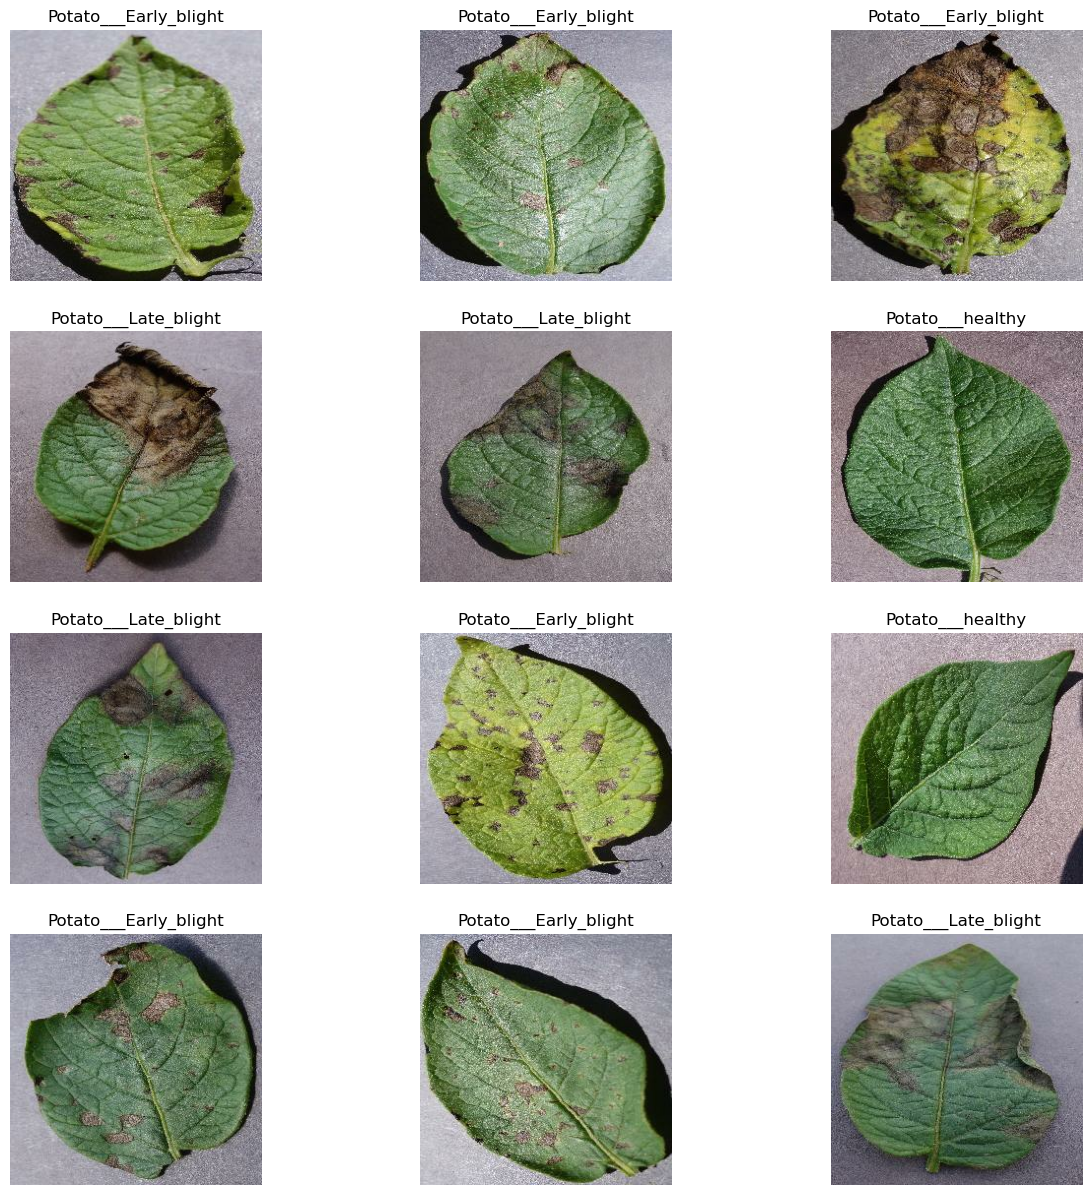

In [15]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #unit8 has to be Mentioned Because it Consideres it as float
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [16]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [18]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


* PREFETCH:FETCHES THE NEXT BATCH OF DATA WHILE THE MODEL IS TRAINING ON THE CURRENT BATCH

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

* RESIZING IS DONE BECAUSE THE USER CAN PROVIDE INPUT OF ANY DIMENSIONS AND SCALING IS DONE TO NORMALIZE THE VALUES BETWEEN 0 AND 1

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
    layers.Rescaling(1.0 / 255)  # Normalize pixel values
])

* CNN BY ITSELF DOES NOT TAKE CARE OF ROTATION AND SCALING SO WE DO DATA AUGMENTATION*

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),  # Zooms in/out by up to 20%
    layers.RandomContrast(0.2),  # Adjusts contrast randomly
])

**CNN MODEL**

In [26]:
for im_b,lab_b in train_ds.take(1):
    print(im_b.shape) #Input Image Size

(32, 256, 256, 3)


In [27]:
#To Ignore the Warnings
import warnings 
warnings.filterwarnings('ignore')

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(classes,activation='softmax'),
])

In [29]:
model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
EPOCHS=50 #Defining the Epochs

In [33]:
History=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4654 - loss: 0.9504 - val_accuracy: 0.5052 - val_loss: 0.8651
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6347 - loss: 0.7247 - val_accuracy: 0.5990 - val_loss: 0.8254
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.7681 - loss: 0.5483 - val_accuracy: 0.8646 - val_loss: 0.3340
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8226 - loss: 0.4138 - val_accuracy: 0.7969 - val_loss: 0.4097
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8481 - loss: 0.3645 - val_accuracy: 0.8698 - val_loss: 0.3224
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9246 - loss: 0.2040 - val_accuracy: 0.8490 - val_loss: 0.3512
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9419 - loss: 0.1710 - val_accuracy: 0.8125 - val_loss: 0.6286
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9415 - loss: 0.1716 - val_accuracy: 0.9010 - val

In [34]:
scores=model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 525ms/step - accuracy: 0.9854 - loss: 0.0429


[0.04553718864917755, 0.98828125]

In [35]:
History

In [36]:
History.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [37]:
History.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

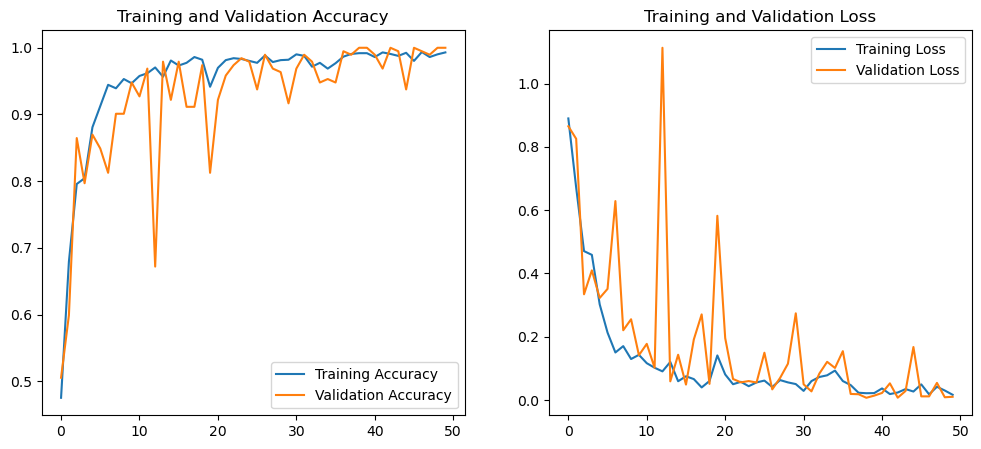

In [38]:
EPOCHS = len(History.history['loss'])  # Get the number of epochs from training history
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

# Create a single figure with 1 row, 2 columns
plt.figure(figsize=(12, 5))  # Adjust the figure size

# 🔹 Plot Accuracy (Left Side)
plt.subplot(1, 2, 1)  
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

# 🔹 Plot Loss (Right Side)
plt.subplot(1, 2, 2)  
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()


In [39]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


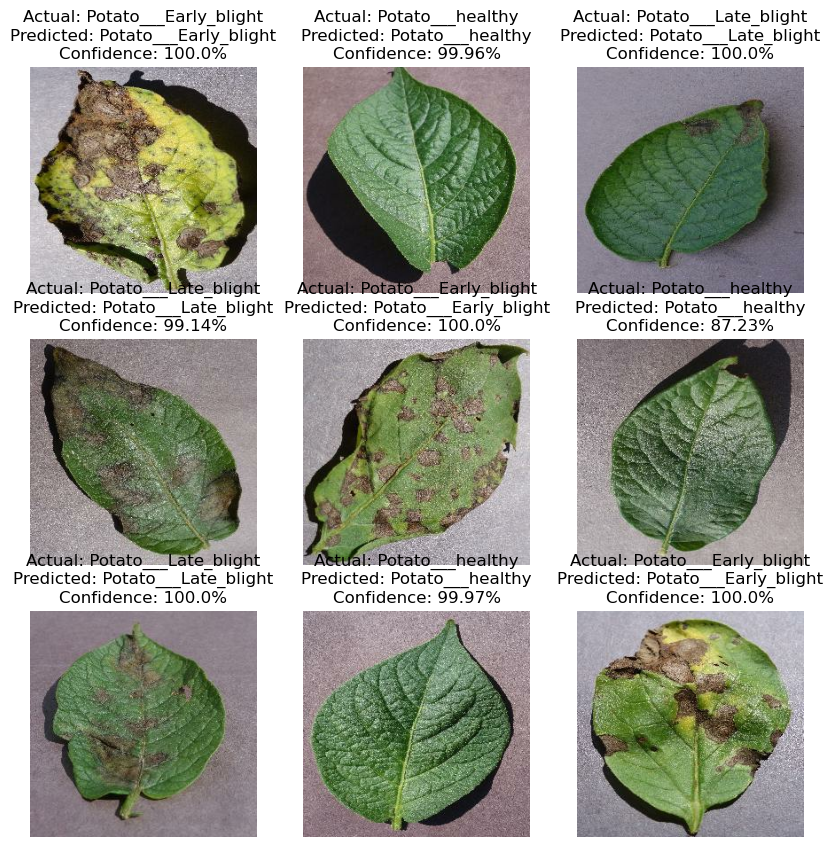

In [40]:
def predict(model, img):
    # Convert image to tensor if it's not already
    if not isinstance(img, tf.Tensor):
        img = tf.convert_to_tensor(img)

    img_array = tf.keras.preprocessing.image.img_to_array(img)  # No need for .numpy()
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions for batch
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    
    return predicted_class, confidence

# Plot images and predictions
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Convert tensor to NumPy for display
        
        predict_class, confidence = predict(model, images[i])  # Pass tensor directly (Fix)
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predict_class}\nConfidence: {confidence}%")
        plt.axis('off')

plt.show()

In [41]:
model.save("../models/potato_disease_model_1.keras")

In [42]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
classes=3

In [43]:
from tensorflow.keras.regularizers import l2

model_v2 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),  # Dropout to prevent overfitting

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),  # Normalize activations

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),  

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    layers.Dropout(0.4),  
    layers.Dense(classes, activation='softmax'),
])
model_v2.build(input_shape=input_shape)

In [44]:
model_v2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history2= model_v2.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=40, 
                    verbose=1)


Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.6527 - loss: 23.5662 - val_accuracy: 0.5521 - val_loss: 4.3932
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.9087 - loss: 3.2234 - val_accuracy: 0.4479 - val_loss: 2.8234
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.9242 - loss: 1.9234 - val_accuracy: 0.5052 - val_loss: 2.0167
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9260 - loss: 1.2340 - val_accuracy: 0.5000 - val_loss: 1.6108
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9314 - loss: 0.8884 - val_accuracy: 0.5312 - val_loss: 1.3476
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9302 - loss: 0.6656 - val_accuracy: 0.4948 - val_loss: 1.2878
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9541 - loss: 0.4961 - val_accuracy: 0.5625 - val_loss: 1.2941
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9222 - loss: 0.4659 - val_accuracy: 0.6094 - 

In [45]:
scores2=model_v2.evaluate(test_ds)
scores2

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 710ms/step - accuracy: 0.9522 - loss: 0.2748


[0.2628767490386963, 0.96484375]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


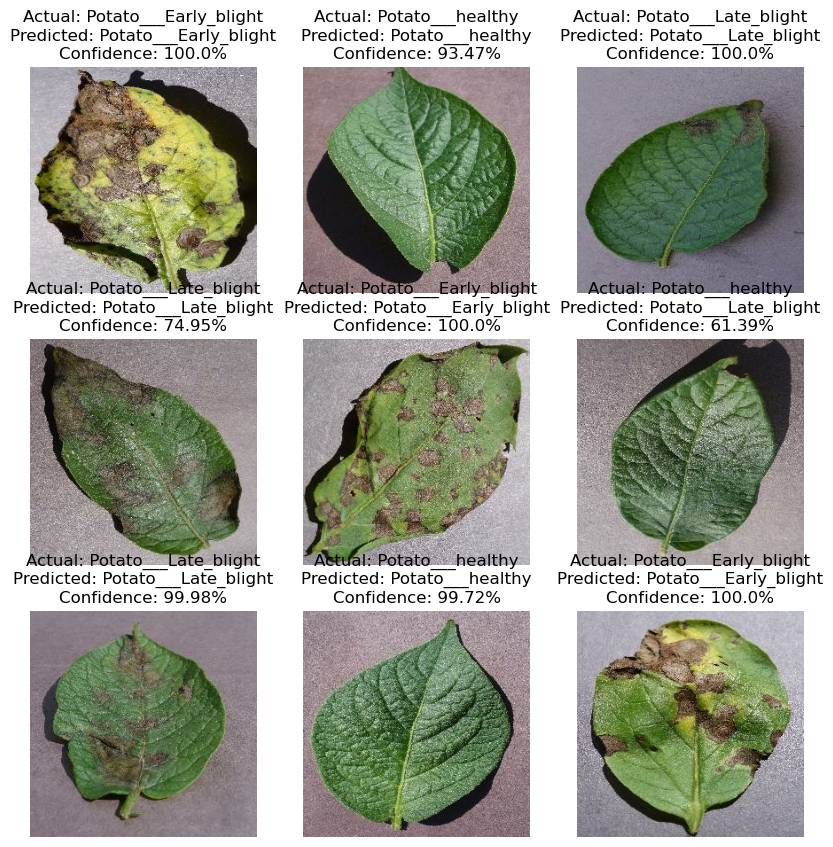

In [46]:
def predict(model, img):
    # Convert image to tensor if it's not already
    if not isinstance(img, tf.Tensor):
        img = tf.convert_to_tensor(img)

    img_array = tf.keras.preprocessing.image.img_to_array(img)  # No need for .numpy()
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions for batch
    predictions = model_v2.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    
    return predicted_class, confidence

# Plot images and predictions
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Convert tensor to NumPy for display
        
        predict_class, confidence = predict(model, images[i])  # Pass tensor directly (Fix)
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predict_class}\nConfidence: {confidence}%")
        plt.axis('off')

plt.show()

In [47]:
model_v2.save("../models/potato_disease_model_2.keras")

In [48]:
model_v3 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256, (3,3)),
    layers.LeakyReLU(alpha=0.1),  # Alternative activation
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(classes, activation='softmax'),
])
model_v3.build(input_shape=input_shape)

In [54]:
model_v3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history3= model_v3.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=35, 
                    verbose=1)


Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.7161 - loss: 0.8025 - val_accuracy: 0.8854 - val_loss: 0.2566
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.8962 - loss: 0.2744 - val_accuracy: 0.9167 - val_loss: 0.2042
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9326 - loss: 0.1660 - val_accuracy: 0.9375 - val_loss: 0.1539
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9385 - loss: 0.1488 - val_accuracy: 0.9792 - val_loss: 0.0910
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9475 - loss: 0.1322 - val_accuracy: 0.9688 - val_loss: 0.0965
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9571 - loss: 0.1170 - val_accuracy: 0.8542 - val_loss: 0.3668
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9429 - loss: 0.1438 - val_accuracy: 0.8594 - val_loss: 0.3723
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9615 - loss: 0.1123 - val_accuracy: 0.9167 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


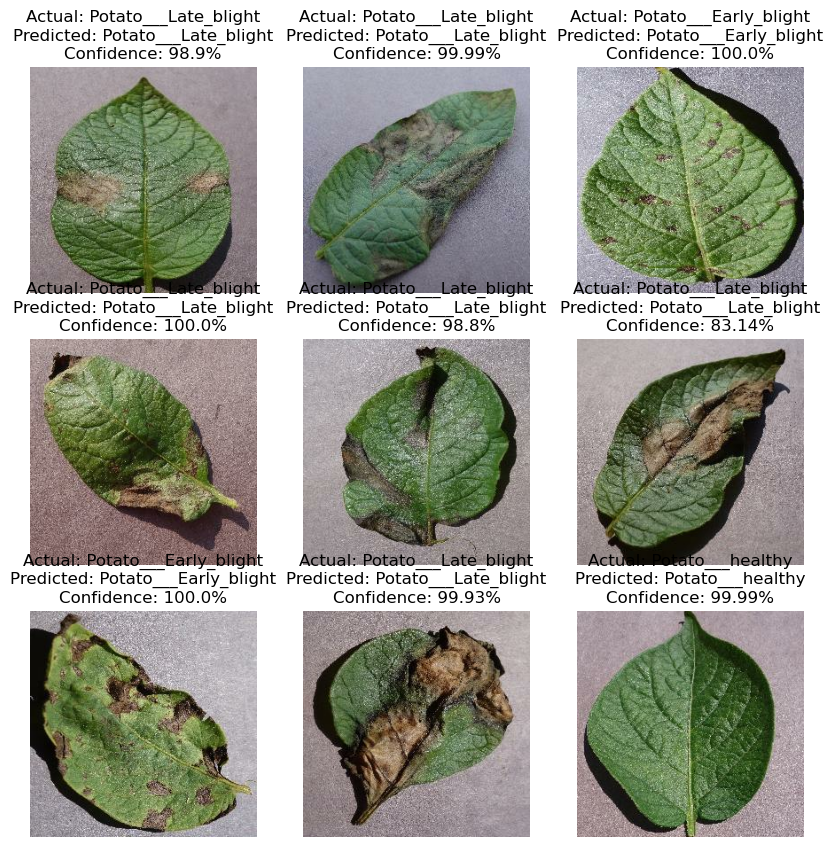

In [56]:
def predict(model, img):
    # Convert image to tensor if it's not already
    if not isinstance(img, tf.Tensor):
        img = tf.convert_to_tensor(img)

    img_array = tf.keras.preprocessing.image.img_to_array(img)  # No need for .numpy()
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions for batch
    predictions = model_v3.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    
    return predicted_class, confidence

# Plot images and predictions
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Convert tensor to NumPy for display
        
        predict_class, confidence = predict(model, images[i])  # Pass tensor directly (Fix)
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predict_class}\nConfidence: {confidence}%")
        plt.axis('off')

plt.show()

In [57]:
scores3=model_v3.evaluate(test_ds)
scores3

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 838ms/step - accuracy: 0.9819 - loss: 0.0755


[0.08347310870885849, 0.98046875]

In [60]:
model_v3.save("../models/potato_disease_model_3.keras")